In [1]:
import numpy as np 

In [13]:
psi = np.load("D:\\zjPhD\\Programzj\\psitouTest\\data\\data\\ux_0.npy")

In [14]:
psi.shape

(1, 1, 512, 512)

In [7]:
import matplotlib.pyplot as plt

In [8]:
psi1=psi[0,0,:,:]

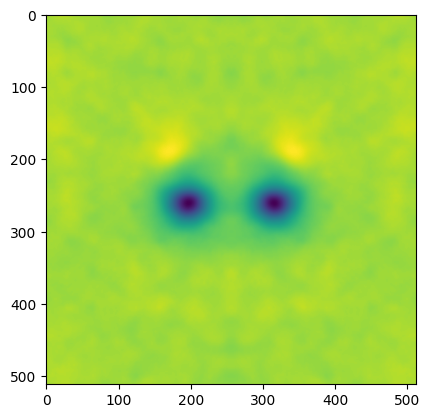

In [9]:
plt.imshow(psi1)

In [6]:
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split

# 设置文件路径
source_dir = r"D:\zjPhD\Programzj\psitouTest\data\data"
output_dir = r"D:\zjPhD\Programzj\psitouTest\GLT_Noise_Net\data"
model_a_dir = os.path.join(output_dir, "modelA")
model_b_dir = os.path.join(output_dir, "modelB")

# 确保输出目录存在
os.makedirs(model_a_dir, exist_ok=True)
os.makedirs(model_b_dir, exist_ok=True)

for folder in ["train", "test", "val"]:
    for model_dir in [model_a_dir, model_b_dir]:
        os.makedirs(os.path.join(model_dir, folder, "input"), exist_ok=True)
        os.makedirs(os.path.join(model_dir, folder, "target"), exist_ok=True)

# 添加噪声函数
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# 加载无噪声数据
ux_files = [os.path.join(source_dir, f"ux_{i}.npy") for i in range(101)]
uy_files = [os.path.join(source_dir, f"uy_{i}.npy") for i in range(101)]
psi1_real_files = [os.path.join(source_dir, f"psi1_real_{i}.npy") for i in range(101)]
psi1_imag_files = [os.path.join(source_dir, f"psi1_imag_{i}.npy") for i in range(101)]

# 将数据划分为训练、验证和测试集
indices = list(range(101))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=42)

# 数据处理与保存
def process_and_save_data(model, indices, data_type="train"):
    for i in indices:
        # 加载速度场和波函数数据
        ux = np.load(ux_files[i])
        uy = np.load(uy_files[i])
        psi_real = np.load(psi1_real_files[i])
        psi_imag = np.load(psi1_imag_files[i])

        # 构建目标数据：无噪声波函数（模型A和模型B的target都一样）
        target = np.stack([psi_real, psi_imag], axis=1)  # shape: (1, 2, 512, 512)

        if model == "modelA":
            # 为模型A添加噪声的速度场
            ux_noisy = add_gaussian_noise(ux)
            uy_noisy = add_gaussian_noise(uy)
            input_data = np.stack([ux_noisy, uy_noisy], axis=1)  # shape: (1, 2, 512, 512)
        else:
            # 为模型B：模型A的输出作为输入
            input_data = target  # 假设模型A的输出接近于目标

        # 保存数据
        model_dir = model_a_dir if model == "modelA" else model_b_dir
        np.save(os.path.join(model_dir, data_type, "input", f"{i:03d}.npy"), input_data)
        np.save(os.path.join(model_dir, data_type, "target", f"{i:03d}.npy"), target)

# 处理并保存模型A和模型B的数据
process_and_save_data("modelA", train_idx, "train")
process_and_save_data("modelA", val_idx, "val")
process_and_save_data("modelA", test_idx, "test")

process_and_save_data("modelB", train_idx, "train")
process_and_save_data("modelB", val_idx, "val")
process_and_save_data("modelB", test_idx, "test")


In [15]:
ux_0 = np.load("D:\\zjPhD\\Programzj\\psitouTest\\GLT_Noise_Net\\data\\modelA\\train\\input\\003.npy")

ux_0.shape

(1, 2, 1, 512, 512)

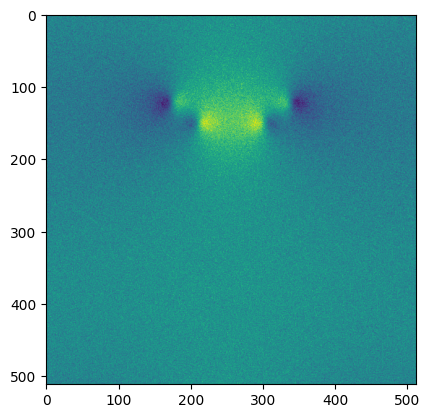

In [17]:
import matplotlib.pyplot as plt
plt.imshow(ux_0[0,0,0,:,:])

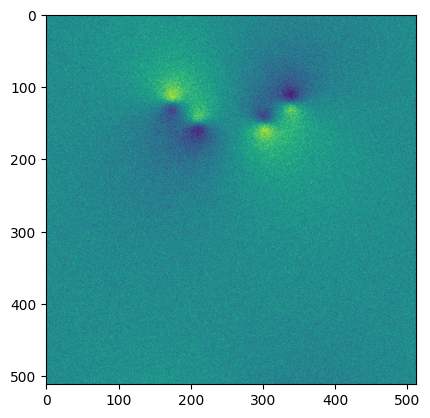

In [18]:
plt.imshow(ux_0[0,1,0,:,:])

In [19]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

# 设置文件路径
source_dir = r"D:\zjPhD\Programzj\psitouTest\data\data"
output_dir = r"D:\zjPhD\Programzj\psitouTest\GLT_Noise_Net\data"
model_a_dir = os.path.join(output_dir, "modelA")
model_b_dir = os.path.join(output_dir, "modelB")

# 确保输出目录存在
os.makedirs(model_a_dir, exist_ok=True)
os.makedirs(model_b_dir, exist_ok=True)

for folder in ["train", "test", "val"]:
    for model_dir in [model_a_dir, model_b_dir]:
        os.makedirs(os.path.join(model_dir, folder, "input"), exist_ok=True)
        os.makedirs(os.path.join(model_dir, folder, "target"), exist_ok=True)

# 添加噪声函数
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# 加载无噪声数据
ux_files = [os.path.join(source_dir, f"ux_{i}.npy") for i in range(101)]
uy_files = [os.path.join(source_dir, f"uy_{i}.npy") for i in range(101)]
psi1_real_files = [os.path.join(source_dir, f"psi1_real_{i}.npy") for i in range(101)]
psi1_imag_files = [os.path.join(source_dir, f"psi1_imag_{i}.npy") for i in range(101)]
psi2_real_files = [os.path.join(source_dir, f"psi2_real_{i}.npy") for i in range(101)]
psi2_imag_files = [os.path.join(source_dir, f"psi2_imag_{i}.npy") for i in range(101)]

# 将数据划分为训练、验证和测试集
indices = list(range(101))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.25, random_state=42)

# 数据处理与保存
def process_and_save_data(model, indices, data_type="train", noise_std=0.1):
    for i in indices:
        # 加载速度场和波函数数据
        ux = np.load(ux_files[i])
        uy = np.load(uy_files[i])
        psi1_real = np.load(psi1_real_files[i])
        psi1_imag = np.load(psi1_imag_files[i])
        psi2_real = np.load(psi2_real_files[i])
        psi2_imag = np.load(psi2_imag_files[i])

        # 构建目标数据：无噪声波函数
        target = np.concatenate([psi1_real, psi1_imag, psi2_real, psi2_imag], axis=1)  # shape: (1, 4, 512, 512)

        if model == "modelA":
            # 为模型A添加噪声的速度场，并记录噪声等级
            ux_noisy = add_gaussian_noise(ux, std=noise_std)
            uy_noisy = add_gaussian_noise(uy, std=noise_std)

            # 保存带噪声的速度场数据到modelA的input
            np.save(os.path.join(model_a_dir, data_type, "input", f"ux_noisy_std{noise_std}_{i:03d}.npy"), ux_noisy)
            np.save(os.path.join(model_a_dir, data_type, "input", f"uy_noisy_std{noise_std}_{i:03d}.npy"), uy_noisy)

            # 保存无噪声的目标数据到modelA的target
            np.save(os.path.join(model_a_dir, data_type, "target", f"psi_target_{i:03d}.npy"), target)

        else:
            # 为模型B，假设模型A的输出接近于目标
            input_data = target

            # 保存模型B的输入数据到modelB的input
            np.save(os.path.join(model_b_dir, data_type, "input", f"psi_noisy_output_{i:03d}.npy"), input_data)

            # 保存无噪声的目标数据到modelB的target
            np.save(os.path.join(model_b_dir, data_type, "target", f"psi_target_{i:03d}.npy"), target)

# 处理并保存模型A和模型B的数据
process_and_save_data("modelA", train_idx, "train", noise_std=0.1)
process_and_save_data("modelA", val_idx, "val", noise_std=0.1)
process_and_save_data("modelA", test_idx, "test", noise_std=0.1)

process_and_save_data("modelB", train_idx, "train")
process_and_save_data("modelB", val_idx, "val")
process_and_save_data("modelB", test_idx, "test")


In [22]:
ux_0 = np.load("D:\\zjPhD\\Programzj\\psitouTest\\GLT_Noise_Net\\data\\modelA\\train\\target\\psi_target_001.npy")

ux_0.shape

(1, 4, 512, 512)

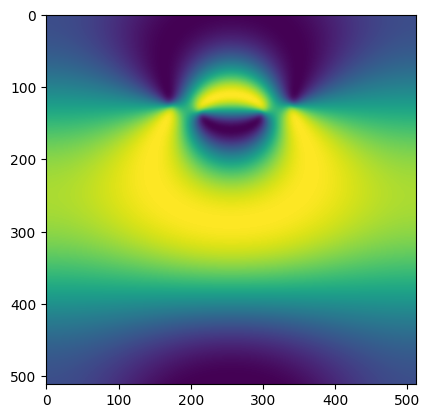

In [24]:
import matplotlib.pyplot as plt
plt.imshow(ux_0[0,1,:,:])

In [32]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# 检查是否使用 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# 1. 数据集定义
# ------------------------------

In [33]:
class FluidDataset(Dataset):
    def __init__(self, input_dir, target_dir):
        # 加载文件列表
        self.ux_files = sorted([f for f in os.listdir(input_dir) if f.startswith("ux")])
        self.uy_files = sorted([f for f in os.listdir(input_dir) if f.startswith("uy")])
        self.target_files = sorted(os.listdir(target_dir))

        # 检查文件数量是否匹配
        if not (len(self.ux_files) == len(self.uy_files) == len(self.target_files)):
            raise ValueError("Input files and target files do not match in expected quantity.")

        self.input_dir = input_dir
        self.target_dir = target_dir

    def __len__(self):
        return len(self.target_files)

    def __getitem__(self, idx):
        # 加载 ux 和 uy 数据
        ux = np.load(os.path.join(self.input_dir, self.ux_files[idx])).squeeze(0)
        uy = np.load(os.path.join(self.input_dir, self.uy_files[idx])).squeeze(0)
        input_data = np.concatenate((ux, uy), axis=0)

        # 加载目标数据
        target = np.load(os.path.join(self.target_dir, self.target_files[idx])).squeeze(0)

        # 转换为张量
        input_data = torch.tensor(input_data, dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.float32)

        return input_data, target


# ------------------------------
# 2. 模型定义
# ------------------------------

In [34]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.3):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return self.relu(out)

class ModelA_ResNet(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(ModelA_ResNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            ResidualBlock(64, 128, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(128, 256, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(256, 512, stride=2, dropout_rate=dropout_rate),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(256, 256, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(128, 128, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(64, 4, kernel_size=3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return F.interpolate(x, size=(512, 512), mode='bilinear', align_corners=False)


# ------------------------------
# 3. 训练和测试
# ------------------------------

In [ ]:
# 计算精度的函数
def calculate_accuracy(output, target, threshold=0.1):
    diff = torch.abs(output - target)
    correct = (diff < threshold).float()
    return correct.mean().item()


In [ ]:
def train_model(model, dataloader, criterion, num_epochs=100, threshold=0.1, save_epochs=[1, 50, 100]):
    optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-4)
    writer = SummaryWriter(log_dir='training_logs')
    model.train()
    epoch_losses, epoch_accuracies = [], []

    for epoch in range(num_epochs):
        running_loss, running_accuracy = 0.0, 0.0
        for i, (imgs, targets) in enumerate(dataloader):
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            running_accuracy += accuracy

            if i % 10 == 0:
                writer.add_scalar('Training Loss', loss.item(), epoch * len(dataloader) + i)
                writer.add_scalar('Training Accuracy', accuracy, epoch * len(dataloader) + i)
        
        epoch_loss = running_loss / len(dataloader)
        epoch_accuracy = running_accuracy / len(dataloader)
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    writer.close()
    np.save('epoch_losses.npy', np.array(epoch_losses))
    np.save('epoch_accuracies.npy', np.array(epoch_accuracies))


In [35]:
def test_model(model, dataloader, criterion, threshold=0.1):
    model.eval()
    test_loss, test_accuracy = 0.0, 0.0
    all_predictions, all_targets = [], []

    with torch.no_grad():
        for imgs, targets in dataloader:
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)
            test_loss += loss.item()
            test_accuracy += accuracy
            all_predictions.append(outputs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    avg_test_loss = test_loss / len(dataloader)
    avg_test_accuracy = test_accuracy / len(dataloader)
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_accuracy:.4f}")
    np.save('predictions.npy', np.concatenate(all_predictions, axis=0))
    np.save('targets.npy', np.concatenate(all_targets, axis=0))

    return avg_test_loss, avg_test_accuracy

# ------------------------------
# 4. 速度计算
# ------------------------------

In [ ]:
def calculate_velocity(psi_real, psi_imag):
    a, b, c, d = psi_real[0], psi_imag[0], psi_real[1], psi_imag[1]
    da_dx, da_dy = np.gradient(a, axis=(1, 0))
    db_dx, db_dy = np.gradient(b, axis=(1, 0))
    dc_dx, dc_dy = np.gradient(c, axis=(1, 0))
    dd_dx, dd_dy = np.gradient(d, axis=(1, 0))

    u_x = a * db_dx - b * da_dx + c * dd_dx - d * dc_dx
    u_y = a * db_dy - b * da_dy + c * dd_dy - d * dc_dy

    return u_x, u_y

# ------------------------------
# 5. 主程序：训练和测试
# ------------------------------

In [ ]:
# 加载训练集
train_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/input'
train_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/target'
train_dataset = FluidDataset(train_input_dir, train_target_dir)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# 初始化模型、损失函数和优化器
model = ModelA_ResNet().to(device)
criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00001)

# 训练模型
# train_model(model, train_dataloader, criterion, optimizer, num_epochs=1000, threshold=0.1)
train_model(model, train_dataloader, criterion, num_epochs=500, threshold=0.1)

# 保存模型
torch.save(model.state_dict(), 'modelA_trained.pth')


In [9]:
# 加载测试集并评估模型
test_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/input'
test_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/target'
test_dataset = FluidDataset(test_input_dir, test_target_dir)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 重新加载训练好的模型
model.load_state_dict(torch.load('modelA_trained.pth'))
test_loss, test_accuracy = test_model(model, test_dataloader, criterion, threshold=0.1)

Test Loss: 0.1777, Test Accuracy: 0.5517


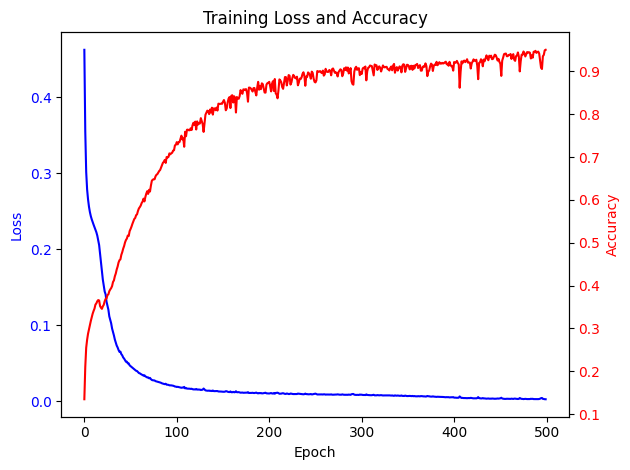

In [13]:
# 加载损失和准确率数据
epoch_losses = np.load('epoch_losses.npy')
epoch_accuracies = np.load('epoch_accuracies.npy')

# 绘制双 y 轴图表
fig, ax1 = plt.subplots()

# 绘制损失曲线
ax1.plot(epoch_losses, 'b-', label='Loss')  # 'b-' 表示蓝色实线
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个 y 轴并绘制准确率曲线
ax2 = ax1.twinx()
ax2.plot(epoch_accuracies, 'r-', label='Accuracy')  # 'r-' 表示红色实线
ax2.set_ylabel('Accuracy', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加标题和显示图表
plt.title('Training Loss and Accuracy')
fig.tight_layout()  # 自动调整布局，以防止标签重叠
plt.show()

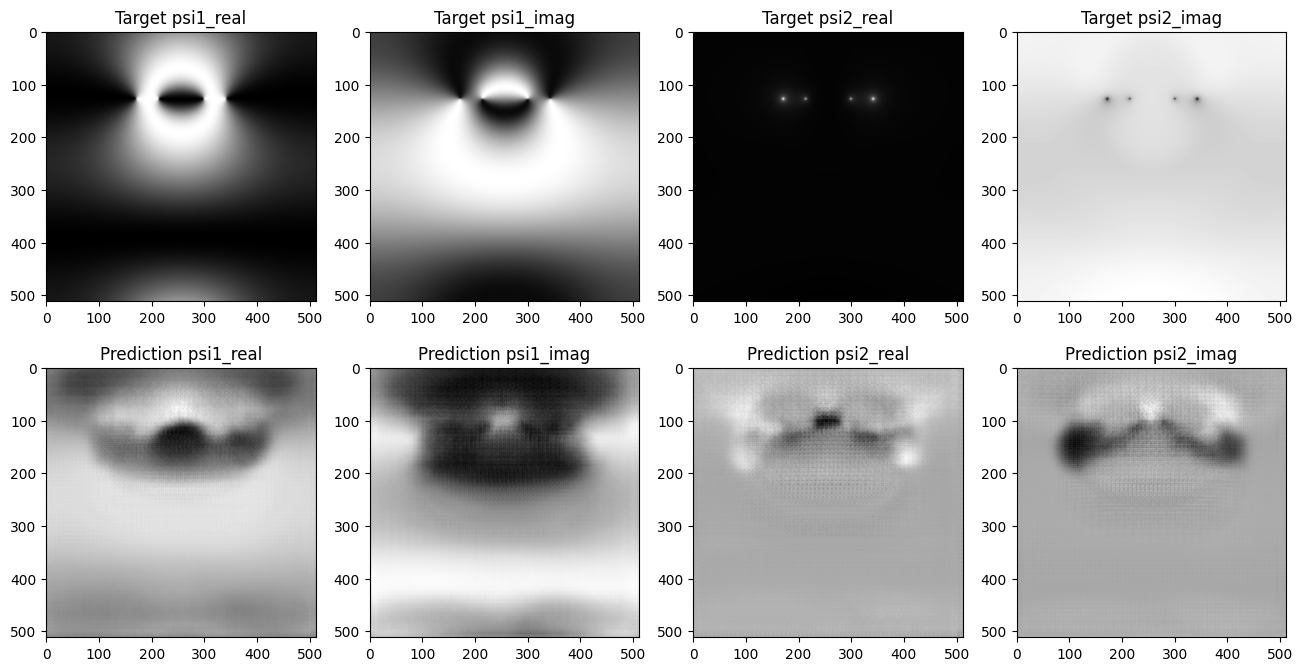

In [14]:
# 加载预测数据和真实数据
predictions = np.load('predictions.npy')
targets = np.load('targets.npy')

# 绘制第一个样本的预测和真实数据对比
import matplotlib.pyplot as plt

# 假设预测和真实数据的形状是 (num_samples, 4, 512, 512)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 绘制 psi1_real, psi1_imag, psi2_real, psi2_imag 的预测和真实数据对比
titles = ['psi1_real', 'psi1_imag', 'psi2_real', 'psi2_imag']
for i in range(4):
    # 真实数据
    axes[0, i].imshow(targets[0, i], cmap='gray')
    axes[0, i].set_title(f"Target {titles[i]}")
    
    # 预测数据
    axes[1, i].imshow(predictions[0, i], cmap='gray')
    axes[1, i].set_title(f"Prediction {titles[i]}")

plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 读取保存的损失和准确率数据
epoch_losses = np.load('epoch_losses.npy')
epoch_accuracies = np.load('epoch_accuracies.npy')

# 读取每个 epoch 的预测和目标数据
all_predictions = np.load('predictions.npy', allow_pickle=True)
all_targets = np.load('targets.npy', allow_pickle=True)



In [19]:
all_targets.shape,all_predictions.shape

((21, 4, 512, 512), (21, 4, 512, 512))

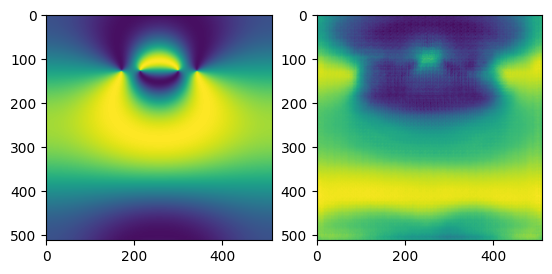

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(all_targets[0,1,:,:])

plt.subplot(1, 2, 2)
plt.imshow(all_predictions[0,1,:,:])

In [22]:
psi1_real_targets = all_targets[0,0,:,:]
psi1_imag_targets = all_targets[0,1,:,:]

psi2_real_targets = all_targets[0,2,:,:]
psi2_imag_targets = all_targets[0,3,:,:]


psi1_real_predictions = all_predictions[0,0,:,:]
psi1_imag_predictions = all_predictions[0,1,:,:]

psi2_real_predictions = all_predictions[0,2,:,:]
psi2_imag_predictions = all_predictions[0,3,:,:]

In [23]:
import numpy as np

# 从数据中提取 a, b, c, d
a_targets, b_targets, c_targets, d_targets = psi1_real_targets, psi1_imag_targets, psi2_real_targets, psi2_imag_targets
a_predictions, b_predictions, c_predictions, d_predictions = psi1_real_predictions, psi1_imag_predictions, psi2_real_predictions, psi2_imag_predictions

# 定义常数 h_bar (如果需要)
h_bar = 1  # 或者使用其他值

# 计算真实数据的偏导数
da_dx, da_dy = np.gradient(a_targets, axis=(1, 0))
db_dx, db_dy = np.gradient(b_targets, axis=(1, 0))
dc_dx, dc_dy = np.gradient(c_targets, axis=(1, 0))
dd_dx, dd_dy = np.gradient(d_targets, axis=(1, 0))

# 计算预测数据的偏导数
da_dx_pred, da_dy_pred = np.gradient(a_predictions, axis=(1, 0))
db_dx_pred, db_dy_pred = np.gradient(b_predictions, axis=(1, 0))
dc_dx_pred, dc_dy_pred = np.gradient(c_predictions, axis=(1, 0))
dd_dx_pred, dd_dy_pred = np.gradient(d_predictions, axis=(1, 0))

# 计算真实数据的速度 u_x 和 u_y
u_x_targets = h_bar * (a_targets * db_dx - b_targets * da_dx + c_targets * dd_dx - d_targets * dc_dx)
u_y_targets = h_bar * (a_targets * db_dy - b_targets * da_dy + c_targets * dd_dy - d_targets * dc_dy)

# 计算预测数据的速度 u_x 和 u_y
u_x_predictions = h_bar * (a_predictions * db_dx_pred - b_predictions * da_dx_pred + c_predictions * dd_dx_pred - d_predictions * dc_dx_pred)
u_y_predictions = h_bar * (a_predictions * db_dy_pred - b_predictions * da_dy_pred + c_predictions * dd_dy_pred - d_predictions * dc_dy_pred)

# 计算误差（如需要）
u_x_error = u_x_predictions - u_x_targets
u_y_error = u_y_predictions - u_y_targets


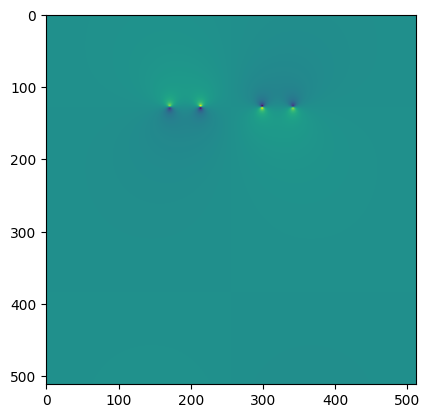

In [30]:
plt.imshow(u_x_targets)


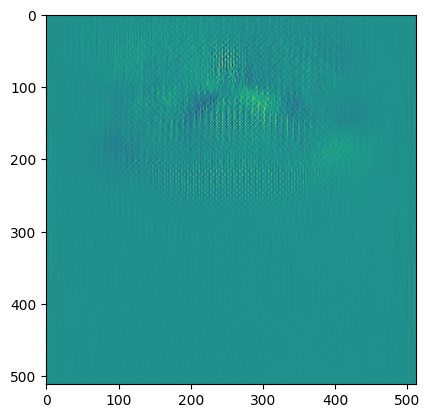

In [29]:
plt.imshow(u_x_predictions)

Epoch [1/500], Loss: 0.4585, Accuracy: 0.1292
Epoch [2/500], Loss: 0.3555, Accuracy: 0.1988
Epoch [3/500], Loss: 0.3048, Accuracy: 0.2491
Epoch [4/500], Loss: 0.2816, Accuracy: 0.2747
Epoch [5/500], Loss: 0.2679, Accuracy: 0.2896
Epoch [6/500], Loss: 0.2576, Accuracy: 0.3023
Epoch [7/500], Loss: 0.2505, Accuracy: 0.3147
Epoch [8/500], Loss: 0.2445, Accuracy: 0.3237
Epoch [9/500], Loss: 0.2395, Accuracy: 0.3334
Epoch [10/500], Loss: 0.2359, Accuracy: 0.3424
Epoch [11/500], Loss: 0.2318, Accuracy: 0.3449
Epoch [12/500], Loss: 0.2275, Accuracy: 0.3568
Epoch [13/500], Loss: 0.2207, Accuracy: 0.3515
Epoch [14/500], Loss: 0.2071, Accuracy: 0.3279
Epoch [15/500], Loss: 0.1956, Accuracy: 0.3370
Epoch [16/500], Loss: 0.1900, Accuracy: 0.3443
Epoch [17/500], Loss: 0.1885, Accuracy: 0.3586
Epoch [18/500], Loss: 0.1845, Accuracy: 0.3677
Epoch [19/500], Loss: 0.1811, Accuracy: 0.3751
Epoch [20/500], Loss: 0.1785, Accuracy: 0.3794
Epoch [21/500], Loss: 0.1740, Accuracy: 0.3819
Epoch [22/500], Loss: 

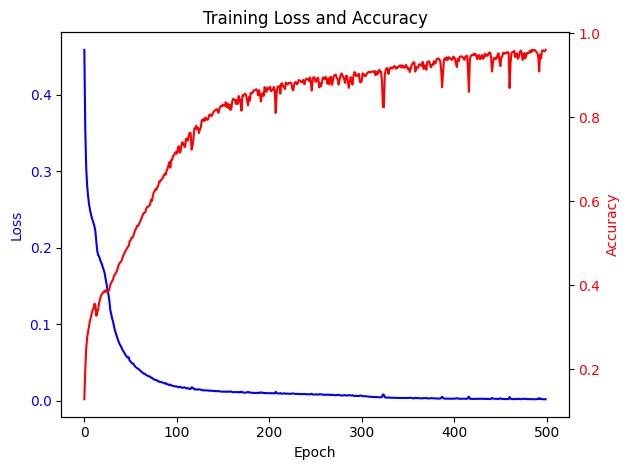

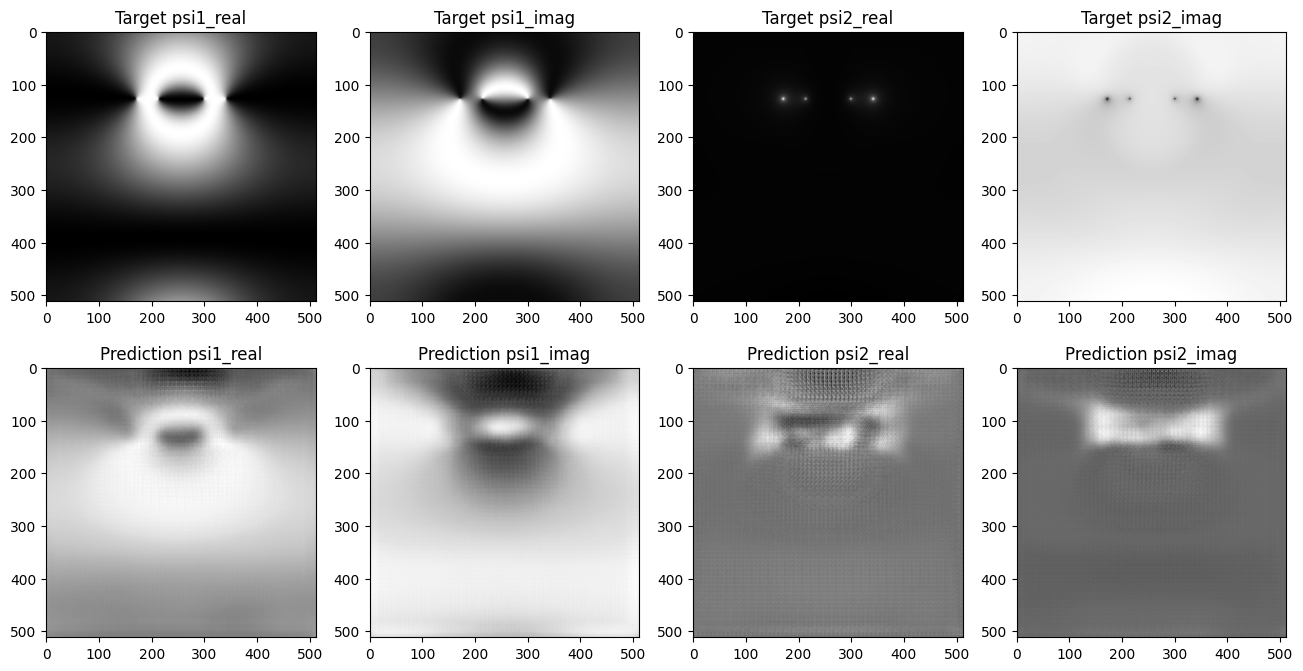

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# 1. Dataset Definition
# ------------------------------
class FluidDataset(Dataset):
    def __init__(self, input_dir, target_dir):
        self.ux_files = sorted([f for f in os.listdir(input_dir) if f.startswith("ux")])
        self.uy_files = sorted([f for f in os.listdir(input_dir) if f.startswith("uy")])
        self.target_files = sorted(os.listdir(target_dir))
        
        # Check if file counts match
        if not (len(self.ux_files) == len(self.uy_files) == len(self.target_files)):
            raise ValueError("Input files and target files do not match in quantity.")
        
        self.input_dir = input_dir
        self.target_dir = target_dir

    def __len__(self):
        return len(self.target_files)

    def __getitem__(self, idx):
        ux = np.load(os.path.join(self.input_dir, self.ux_files[idx])).squeeze(0)
        uy = np.load(os.path.join(self.input_dir, self.uy_files[idx])).squeeze(0)
        input_data = np.concatenate((ux, uy), axis=0)

        target = np.load(os.path.join(self.target_dir, self.target_files[idx])).squeeze(0)

        return torch.tensor(input_data, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

# ------------------------------
# 2. Model Definition
# ------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.3):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return self.relu(out)

class ModelA_ResNet(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(ModelA_ResNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            ResidualBlock(64, 128, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(128, 256, stride=2, dropout_rate=dropout_rate),
            ResidualBlock(256, 512, stride=2, dropout_rate=dropout_rate),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(256, 256, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(128, 128, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            ResidualBlock(64, 64, dropout_rate=dropout_rate),
            nn.ConvTranspose2d(64, 4, kernel_size=3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return F.interpolate(x, size=(512, 512), mode='bilinear', align_corners=False)

# ------------------------------
# 3. Training and Testing Functions
# ------------------------------
def calculate_accuracy(output, target, threshold=0.1):
    return (torch.abs(output - target) < threshold).float().mean().item()

def train_model(model, dataloader, criterion, num_epochs=100, threshold=0.1, save_epochs=[1, 50, 100]):
    optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-4)
    writer = SummaryWriter(log_dir='training_logs')
    model.train()
    
    epoch_losses, epoch_accuracies = [], []
    for epoch in range(num_epochs):
        running_loss, running_accuracy = 0.0, 0.0
        for i, (imgs, targets) in enumerate(dataloader):
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            running_accuracy += accuracy

            if i % 10 == 0:
                writer.add_scalar('Training Loss', loss.item(), epoch * len(dataloader) + i)
                writer.add_scalar('Training Accuracy', accuracy, epoch * len(dataloader) + i)
        
        epoch_losses.append(running_loss / len(dataloader))
        epoch_accuracies.append(running_accuracy / len(dataloader))
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_losses[-1]:.4f}, Accuracy: {epoch_accuracies[-1]:.4f}")
        
    writer.close()
    np.save('epoch_losses.npy', np.array(epoch_losses))
    np.save('epoch_accuracies.npy', np.array(epoch_accuracies))

def test_model(model, dataloader, criterion, threshold=0.1):
    model.eval()
    test_loss, test_accuracy = 0.0, 0.0
    all_predictions, all_targets = [], []

    with torch.no_grad():
        for imgs, targets in dataloader:
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, targets)
            accuracy = calculate_accuracy(outputs, targets, threshold=threshold)

            test_loss += loss.item()
            test_accuracy += accuracy
            all_predictions.append(outputs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    avg_test_loss = test_loss / len(dataloader)
    avg_test_accuracy = test_accuracy / len(dataloader)
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_accuracy:.4f}")

    # 保存预测和目标数据
    np.save('predictions.npy', np.concatenate(all_predictions, axis=0))
    np.save('targets.npy', np.concatenate(all_targets, axis=0))

    # 返回平均测试损失和准确率
    return avg_test_loss, avg_test_accuracy


# ------------------------------
# 4. Velocity Calculation Function
# ------------------------------
def calculate_velocity(psi_real, psi_imag):
    da_dx, da_dy = np.gradient(psi_real[0], axis=(1, 0))
    db_dx, db_dy = np.gradient(psi_imag[0], axis=(1, 0))
    dc_dx, dc_dy = np.gradient(psi_real[1], axis=(1, 0))
    dd_dx, dd_dy = np.gradient(psi_imag[1], axis=(1, 0))

    u_x = psi_real[0] * db_dx - psi_imag[0] * da_dx + psi_real[1] * dd_dx - psi_imag[1] * dc_dx
    u_y = psi_real[0] * db_dy - psi_imag[0] * da_dy + psi_real[1] * dd_dy - psi_imag[1] * dc_dy

    return u_x, u_y

# ------------------------------
# 5. Main Training and Testing Workflow
# ------------------------------
if __name__ == "__main__":
    # Directories
    train_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/input'
    train_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/train/target'
    test_input_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/input'
    test_target_dir = 'D:/zjPhD/Programzj/psitouTest/GLT_Noise_Net/data/modelA/test/target'

    # Prepare datasets and dataloaders
    train_dataset = FluidDataset(train_input_dir, train_target_dir)
    train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

    test_dataset = FluidDataset(test_input_dir, test_target_dir)
    test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    # Initialize model, loss, and optimizer
    model = ModelA_ResNet().to(device)
    criterion = nn.MSELoss()

    # Train the model
    train_model(model, train_dataloader, criterion, num_epochs=500, threshold=0.1)

    # Save trained model
    torch.save(model.state_dict(), 'modelA_trained.pth')

    # Test the model
    model.load_state_dict(torch.load('modelA_trained.pth'))
    test_loss, test_accuracy = test_model(model, test_dataloader, criterion, threshold=0.1)

    # Visualization of loss and accuracy
    epoch_losses = np.load('epoch_losses.npy')
    epoch_accuracies = np.load('epoch_accuracies.npy')
    predictions = np.load('predictions.npy')
    targets = np.load('targets.npy')

    # Plotting training loss and accuracy
    fig, ax1 = plt.subplots()
    ax1.plot(epoch_losses, 'b-', label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(epoch_accuracies, 'r-', label='Accuracy')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title('Training Loss and Accuracy')
    fig.tight_layout()
    plt.show()

    # Display sample prediction vs target
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    titles = ['psi1_real', 'psi1_imag', 'psi2_real', 'psi2_imag']

    for i in range(4):
        # Target data
        axes[0, i].imshow(targets[0, i], cmap='RdBu_r')
        axes[0, i].set_title(f"Target {titles[i]}")
        
        # Prediction data
        axes[1, i].imshow(predictions[0, i], cmap='RdBu_r')
        axes[1, i].set_title(f"Prediction {titles[i]}")

    plt.show()


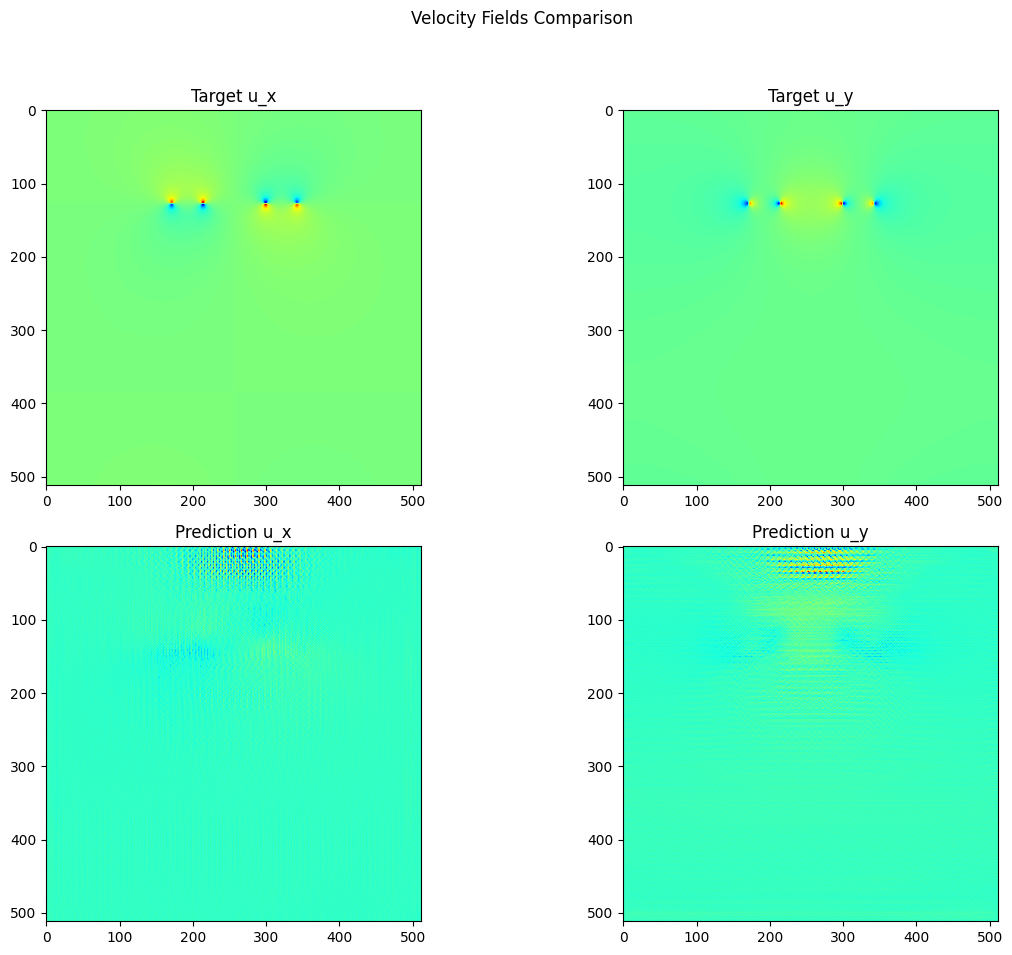

In [4]:
# ------------------------------
# 计算并可视化速度场
# ------------------------------
# 计算真实数据和预测数据的速度场
psi1_real_targets, psi1_imag_targets = targets[0, 0], targets[0, 1]
psi2_real_targets, psi2_imag_targets = targets[0, 2], targets[0, 3]
psi1_real_predictions, psi1_imag_predictions = predictions[0, 0], predictions[0, 1]
psi2_real_predictions, psi2_imag_predictions = predictions[0, 2], predictions[0, 3]

# 真实目标速度场
u_x_targets, u_y_targets = calculate_velocity(
    [psi1_real_targets, psi2_real_targets], 
    [psi1_imag_targets, psi2_imag_targets]
)

# 预测数据速度场
u_x_predictions, u_y_predictions = calculate_velocity(
    [psi1_real_predictions, psi2_real_predictions], 
    [psi1_imag_predictions, psi2_imag_predictions]
)

# 绘制真实和预测的速度场图像
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Velocity Fields Comparison")

# 绘制真实速度场 u_x 和 u_y
axes[0, 0].imshow(u_x_targets, cmap='jet')
axes[0, 0].set_title("Target u_x")

axes[0, 1].imshow(u_y_targets, cmap='jet')
axes[0, 1].set_title("Target u_y")

# 绘制预测速度场 u_x 和 u_y
axes[1, 0].imshow(u_x_predictions, cmap='jet')
axes[1, 0].set_title("Prediction u_x")

axes[1, 1].imshow(u_y_predictions, cmap='jet')
axes[1, 1].set_title("Prediction u_y")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局以防止重叠
plt.show()

In [11]:
targets.shape

(21, 4, 512, 512)

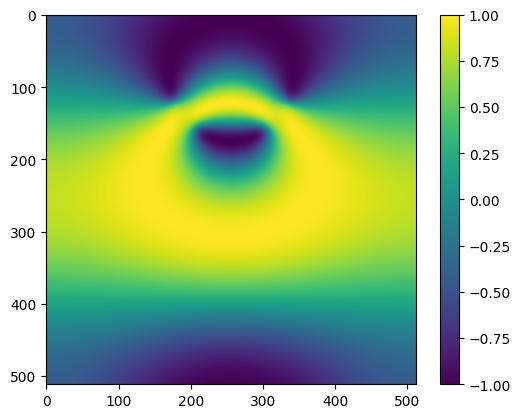

In [19]:
plt.imshow(targets[1,1,:,:],vmin=-1,vmax=1)
plt.colorbar()


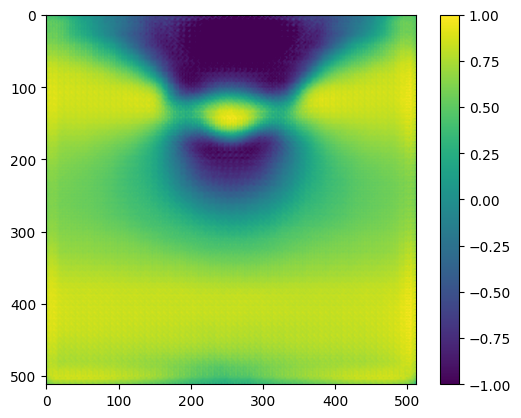

In [18]:
plt.imshow(predictions[1,1,:,:],vmin=-1,vmax=1)
plt.colorbar()

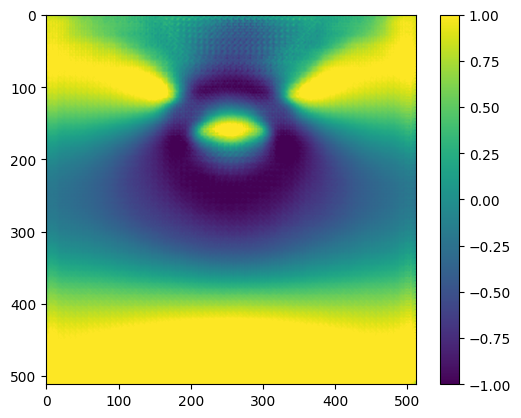

In [21]:
plt.imshow(predictions[1,1,:,:]-targets[1,1,:,:],vmin=-1,vmax=1)

plt.colorbar()